# Evaluating Aircraft safety for Commercial and Private Enterprises: Financial, Operational and Market metrics.

## INTRODUCTION.
**Analysis Objective** 
The primary objective of my analysis is to uncover insights from aviation accident data to advice private and commercial enterprise on which aircraft are the lowest risk to start on.The decision-making is based on four key areas:  
1. **Safety**: I analyzed factors such as the aircraft make and model, the aircraft damage and the total number of injuries to help improve safety protocols.  
2. **Operational Costs**:I Identifyed patterns like broad phase of flight,amateur built,engine type and total injuries to help minimize operational expenses.  
3. **Financial Impact**:I assessed the correlation between purpose of flight, total injuries, aircraft damage and aircraft make to know how much they lose per flight.  
4. **Marketability**:I evaluated how safety perfomance in each country compared to the injuries and purpose of flight to show which countries will pick in the market.

I also documented my process of analyzing the Aviation dataset, starting from understanding the data structure and progressing through the following stages of analysis. Here’s what I did:
1. **Data Structure Overview**: I began by examining the dataset's structure, types of variables,number of rows and columns and the basic characteristics to get an initial overview of the dataset.  
2. **Data Cleaning**:Here,I handled missing values, removed irrelevant columns that were not aligning with my objecties and ensured data consistency to prepare the dataset for further analysis.  
3. **Descriptive Statistics**:I calculated summary statistics to understand the distribution and relationships within the data.  
4. **Feature Engineering**:I created new column variables and refined existing ones to enhance the dataset's analytical potential.  
5. **Exploratory Data Analysis (EDA)**:I visualized and explored patterns, trends, and relationships between the variables in the data to uncover insights that would inform the analysis.

In [3]:
# lets start by importing the neccessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#lets import the aviation dataset
df=pd.read_excel("AviationData.xlsx")
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09 00:00:00
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Data Sctructure Overview 
I got an overview of the dataset by:  
- Viewing the first and last five rows to understand the data structure.  
- Checking the number of rows and column and their titles to ensure proper labelling of the  data variables.
- Summarizing data types and non-null counts to show the completeness of the dataset.  
This provided a clear overview for further analysis.

In [5]:
#checking the first 5 columns of the Aviation data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09 00:00:00
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
#checking the last 5 columns of the Aviation data
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#checking the columns in the Aviation dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
#checking the rows and columns of the Aviation dataset
df.shape

(88889, 31)

In [9]:
#checking the information of the Aviation data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

###  data cleaning
I prepare the dataset for analysis by addressing the missing values of the Aviation dataset. Key steps included:  
1. **Handling Missing Values**:Filling the numerical columns with the mean and categorical columns with the mode helped me fill in the missing null values.  
2. **Removing Irrelevant Columns**:I Dropped columns like **investigation type,Registration number,Engine type,latitude, longitude and FAR Description** that do not align with my analysis objectives.  
3. **Removing Duplicates**:I checked for duplicates to ensure  that all rows are unique.  

In [15]:
#checking for null values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [10]:
#dropping rows with any missing values
df.dropna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [12]:
#dropping unneccessary columns
df.columns = df.columns.str.strip()
columns_to_omit = ['Event.Id',
                   'Investigation.Type'
                   'Accident.Number', 
                   'Registration.Number',
                   'FAR.Description',
                   'Latitude',
                   'Longitude',
                   'Airport.Code',
                   'Schedule',
                   'Airport.Name',
                   'Report.Status',
                   'Publication.Date']
df = df.drop(columns=columns_to_omit, errors='ignore')
print(df.columns)

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')


In [13]:
#filling missing values for categorical objects
categorical_columns=['Location','Country','Injury.Severity','Make','Model','Weather.Condition','Air.carrier','Broad.phase.of.flight','Engine.Type','Aircraft.damage','Aircraft.Category','Purpose.of.flight']
for column in categorical_columns:
    df[column]=df[column].fillna(df[column].mode()[0])
missing_summary=df[categorical_columns].isnull().sum()
print(missing_summary)

Location                 0
Country                  0
Injury.Severity          0
Make                     0
Model                    0
Weather.Condition        0
Air.carrier              0
Broad.phase.of.flight    0
Engine.Type              0
Aircraft.damage          0
Aircraft.Category        0
Purpose.of.flight        0
dtype: int64


In [14]:
#filling missing columns for numerical data
numerical_columns = ['Total.Fatal.Injuries','Number.of.Engines','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
for column in numerical_columns:
    df[column]=df[column].fillna(df[column].mean())
print( df[numerical_columns].isnull().sum())

Total.Fatal.Injuries      0
Number.of.Engines         0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64


In [15]:
#checking if all missing values have been filled
df.isnull().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

### Descriptive  analysis
In this section, I summarized the key characteristics of the dataset to understand its distribution and relationships. This helps provide insights into the data and prepares it for further analysis.
**Key Metrics Calculated:**
- **Central Tendency:** Mean, median, and mode to identify the central values of the numerical columns.
- **Categorical Data:** Frequency counts for categorical variables. 
- **Range of numerical data:** Checking the range between the maximum and minimum values.
- **Checking for unique values:** Checking the unique values  in the categorical data
This step provides an essential overview of the data, revealing key patterns and potential areas for deeper analysis.

In [20]:
#summary statistics for numerical data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.430959,5.122070,1.431309,2.080156,26.969386
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [21]:
#checking  the modes of location,Country,make, model,purpose of flight,aircraft damage and aircraft category
print(df['Location'].mode()[0])
print(df['Make'].mode()[0])
print(df['Model'].mode()[0])
print(df['Aircraft.Category'].mode()[0])
print(df['Country'].mode()[0])
print(df['Aircraft.damage'].mode()[0])
print(df['Purpose.of.flight'].mode()[0])

ANCHORAGE, AK
Cessna
152
Airplane
United States
Substantial
Personal


In [22]:
# Checking the range for total fatal injuries
df['Total.Fatal.Injuries'].max(), df['Total.Fatal.Injuries'].min()

(349.0, 0.0)

In [23]:
# Checking the range for total serious injuries
df['Total.Serious.Injuries'].max(), df['Total.Serious.Injuries'].min()

(161.0, 0.0)

In [24]:
# Checking the range for total minor injuries
df['Total.Minor.Injuries'].max(),df['Total.Minor.Injuries'].min()

(380.0, 0.0)

In [25]:
#unique values in the purpose of flight column
df['Purpose.of.flight'].nunique()

26

In [26]:
#unique values in the injury severity column
df['Make'].nunique()

8237

###  Feature enginering
In the feature engineering process, I created new variables and transformed the existing ones  into combined columns to enhance the dataset's usability for analysis. Key steps include:  
1. **Injury Aggregation**: I combined the injury columns (**Total Fatal Injuries**, **Total Serious Injuries**, and **Total Minor Injuries**) into a single **Total Injuries** column to streamline analysis.  
2. **Injury Type Count**: I created a column summarizing injury counts by type and the highest type that appeared is recorded
3. **Event year** : I summarized the event dates to be grouped by years 

In [46]:
# creating a new column to determine the injury type with the highest count for each row
df['Highest.Injury.Type'] = df[['Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries']].idxmax(axis=1)
df['Highest.Injury.Count'] = df.lookup(df.index, df['Highest.Injury.Type'])
df['Injury.Type.With.Count'] = df['Highest.Injury.Type'].str.replace('Total.', '').str.replace('.Injuries', '') + ' ' + df['Highest.Injury.Count'].astype(str)
print(df[['Injury.Type.With.Count']])

      Injury.Type.With.Count
0                  Fatal 2.0
1                  Fatal 4.0
2                  Fatal 3.0
3                  Fatal 2.0
4                Serious 2.0
...                      ...
88884            Serious 1.0
88885            Serious 0.0
88886            Serious 0.0
88887            Serious 0.0
88888            Serious 1.0

[88889 rows x 1 columns]


In [47]:
# Create a new column 'Total.Injuries' by summing up the injuries columns
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

# Display the updated DataFrame with the new column
print(df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Injuries']])

       Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                       2.0                0.000000              0.000000   
1                       4.0                0.000000              0.000000   
2                       3.0                0.279881              0.357061   
3                       2.0                0.000000              0.000000   
4                       1.0                2.000000              0.357061   
...                     ...                     ...                   ...   
88884                   0.0                1.000000              0.000000   
88885                   0.0                0.000000              0.000000   
88886                   0.0                0.000000              0.000000   
88887                   0.0                0.000000              0.000000   
88888                   0.0                1.000000              0.000000   

       Total.Injuries  
0            2.000000  
1            4.000000  
2  

In [48]:
#checking if the new column has been added to the data
df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Injury.Type.With.Count,Total.Injuries,Event.Year,Avg.Injuries.Per.Year,Highest.Injury.Type,Highest.Injury.Count
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,...,0.000000,0.00000,UNK,Cruise,Fatal 2.0,2.000000,1948,2.000000,Total.Fatal.Injuries,2.0
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,Piper,PA24-180,...,0.000000,0.00000,UNK,Unknown,Fatal 4.0,4.000000,1962,4.000000,Total.Fatal.Injuries,4.0
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,...,0.357061,5.32544,IMC,Cruise,Fatal 3.0,3.636942,1974,3.000000,Total.Fatal.Injuries,3.0
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,...,0.000000,0.00000,IMC,Cruise,Fatal 2.0,2.000000,1977,2.000000,Total.Fatal.Injuries,2.0
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,...,0.357061,0.00000,VMC,Approach,Serious 2.0,3.357061,1979,1.500000,Total.Serious.Injuries,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,PIPER,PA-28-151,...,0.000000,0.00000,VMC,Landing,Serious 1.0,1.000000,2022,0.779091,Total.Serious.Injuries,1.0
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,Substantial,Airplane,BELLANCA,7ECA,...,0.000000,0.00000,VMC,Landing,Serious 0.0,0.000000,2022,0.779091,Total.Serious.Injuries,0.0
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,0.000000,1.00000,VMC,Landing,Serious 0.0,0.000000,2022,0.779091,Total.Serious.Injuries,0.0
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,Substantial,Airplane,CESSNA,210N,...,0.000000,0.00000,VMC,Landing,Serious 0.0,0.000000,2022,0.779091,Total.Serious.Injuries,0.0


In [38]:
#grouping the event date by event year 
df['Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year
df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Injury.Type.With.Count,Total.Injuries,Highest.Injury.Type,Highest.Injury.Count,Event.Year
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,...,0.000000,0.000000,0.00000,UNK,Cruise,Fatal 2.0,2.000000,Total.Fatal.Injuries,2.0,1948
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,Piper,PA24-180,...,0.000000,0.000000,0.00000,UNK,Unknown,Fatal 4.0,4.000000,Total.Fatal.Injuries,4.0,1962
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,...,0.279881,0.357061,5.32544,IMC,Cruise,Fatal 3.0,3.636942,Total.Fatal.Injuries,3.0,1974
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,...,0.000000,0.000000,0.00000,IMC,Cruise,Fatal 2.0,2.000000,Total.Fatal.Injuries,2.0,1977
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,...,2.000000,0.357061,0.00000,VMC,Approach,Serious 2.0,3.357061,Total.Serious.Injuries,2.0,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,PIPER,PA-28-151,...,1.000000,0.000000,0.00000,VMC,Landing,Serious 1.0,1.000000,Total.Serious.Injuries,1.0,2022
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,Substantial,Airplane,BELLANCA,7ECA,...,0.000000,0.000000,0.00000,VMC,Landing,Serious 0.0,0.000000,Total.Serious.Injuries,0.0,2022
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,0.000000,0.000000,1.00000,VMC,Landing,Serious 0.0,0.000000,Total.Serious.Injuries,0.0,2022
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,Substantial,Airplane,CESSNA,210N,...,0.000000,0.000000,0.00000,VMC,Landing,Serious 0.0,0.000000,Total.Serious.Injuries,0.0,2022


In [40]:
# Average injuries per year
avg_injuries_per_year = df.groupby('Event.Year')['Highest.Injury.Count'].mean()
df['Avg.Injuries.Per.Year'] = df['Event.Year'].map(avg_injuries_per_year)
df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Injury.Type.With.Count,Total.Injuries,Highest.Injury.Type,Highest.Injury.Count,Event.Year,Avg.Injuries.Per.Year
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,...,0.000000,0.00000,UNK,Cruise,Fatal 2.0,2.000000,Total.Fatal.Injuries,2.0,1948,2.000000
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,Piper,PA24-180,...,0.000000,0.00000,UNK,Unknown,Fatal 4.0,4.000000,Total.Fatal.Injuries,4.0,1962,4.000000
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,...,0.357061,5.32544,IMC,Cruise,Fatal 3.0,3.636942,Total.Fatal.Injuries,3.0,1974,3.000000
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,...,0.000000,0.00000,IMC,Cruise,Fatal 2.0,2.000000,Total.Fatal.Injuries,2.0,1977,2.000000
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,...,0.357061,0.00000,VMC,Approach,Serious 2.0,3.357061,Total.Serious.Injuries,2.0,1979,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,PIPER,PA-28-151,...,0.000000,0.00000,VMC,Landing,Serious 1.0,1.000000,Total.Serious.Injuries,1.0,2022,0.779091
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,Substantial,Airplane,BELLANCA,7ECA,...,0.000000,0.00000,VMC,Landing,Serious 0.0,0.000000,Total.Serious.Injuries,0.0,2022,0.779091
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,0.000000,1.00000,VMC,Landing,Serious 0.0,0.000000,Total.Serious.Injuries,0.0,2022,0.779091
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,Substantial,Airplane,CESSNA,210N,...,0.000000,0.00000,VMC,Landing,Serious 0.0,0.000000,Total.Serious.Injuries,0.0,2022,0.779091


### explotary data  analysis
In the **Exploratory Data Analysis (EDA)** section, I explored the dataset to identify patterns and relationships. Here’s a summary of what I did:
1. **Data Visualization**:
   - I used **histograms** and **box plots** to understand the distribution of numerical variables.
   - I created **scatter plots** to check the relationships between continuous variables like injury severity and total injuries.
   - I plotted **bar charts** for categorical variables like aircraft make and broad phases of flight to see their frequency distribution.
   - I used a **correlation heatmap** to identify strong relationships between numeric variables.
2. **Identifying Trends and Patterns**:
   - I analyzed patterns like phases of flight that lead to more injuries or higher costs.
   - I observed category-based trends, such as specific aircraft makes having more operational issues.
3. **Handling Outliers**:
   - I identified outliers using box plots or scatter plots and decided whether to remove or keep them.

#### univariate analysis

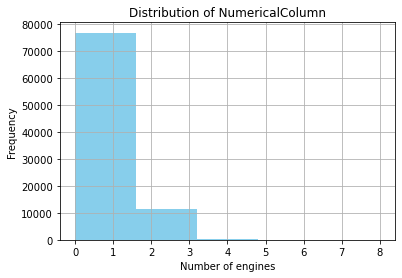

In [52]:
#plotting a histogram for the number of engines
df['Number.of.Engines'].hist(bins=5, color='skyblue')
plt.title('Distribution of NumericalColumn')
plt.xlabel('Number of engines')
plt.ylabel('Frequency')
plt.show()

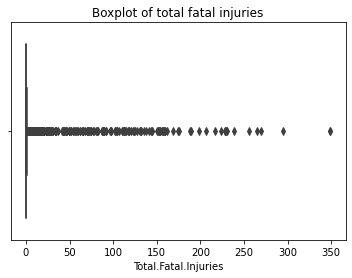

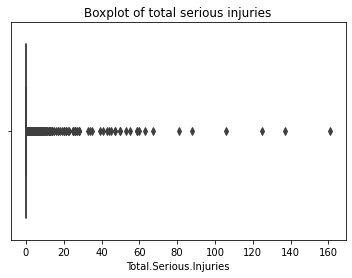

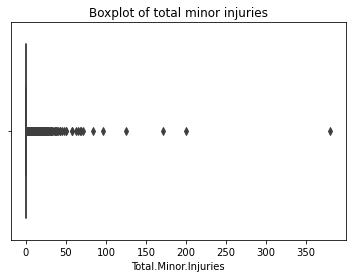

In [53]:
#plotting a boxplot for the total fatal injuries
sns.boxplot(data=df, x='Total.Fatal.Injuries')
plt.title('Boxplot of total fatal injuries')
plt.show()
#plotting a boxplot for the total serious injuries
sns.boxplot(data=df, x='Total.Serious.Injuries')
plt.title('Boxplot of total serious injuries')
plt.show()
#plotting a boxplot for the total minor injuries
sns.boxplot(data=df, x='Total.Minor.Injuries')
plt.title('Boxplot of total minor injuries')
plt.show()

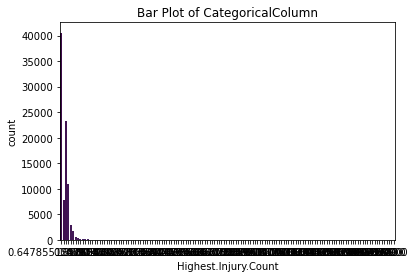

In [54]:
#plotting the count plot of the highest injury count
sns.countplot(data=df, x='Highest.Injury.Count', palette='viridis')
plt.title('Bar Plot of CategoricalColumn')
plt.show()

#### Bivariate analysis

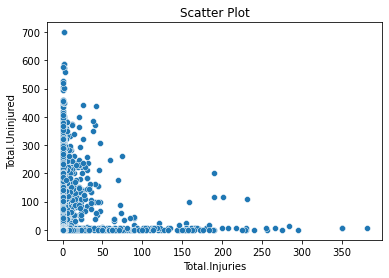

In [55]:
#scatter plot comparing total injuries vs total uninjured
sns.scatterplot(data=df, x='Total.Injuries', y='Total.Uninjured', palette='coolwarm')
plt.title('Scatter Plot')
plt.show()

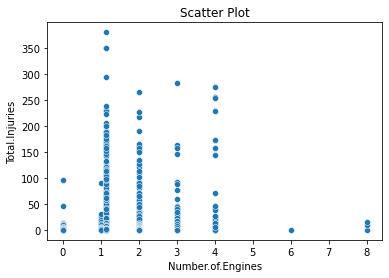

In [56]:
#scatter plot between number of engines and total injuries
sns.scatterplot(data=df, x='Number.of.Engines', y='Total.Injuries', palette='coolwarm')
plt.title('Scatter Plot')
plt.show()

In [57]:
#checking the correlation number of engines and total injuries
print(df[['Number.of.Engines','Total.Injuries']].corr())

                   Number.of.Engines  Total.Injuries
Number.of.Engines           1.000000        0.076605
Total.Injuries              0.076605        1.000000


In [58]:
#checking the correlation number of engines and total injuries
print(df[['Number.of.Engines','Total.Uninjured']].corr())

                   Number.of.Engines  Total.Uninjured
Number.of.Engines           1.000000         0.352261
Total.Uninjured             0.352261         1.000000


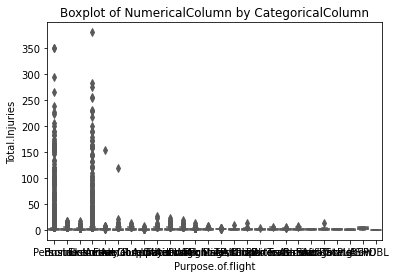

In [60]:
sns.boxplot(data=df, x='Purpose.of.flight', y='Total.Injuries', palette='Set2')
plt.title('Boxplot of NumericalColumn by CategoricalColumn')
plt.show()

#### multivariate analysis

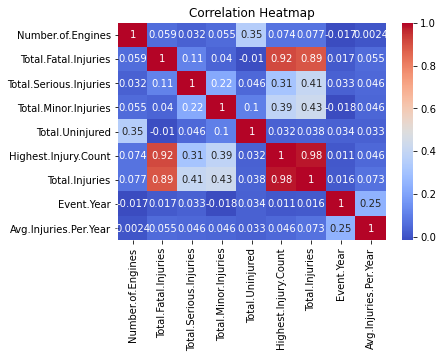

In [46]:
#heatmap displaying all the variables 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(df, hue='Make', palette='coolwarm')
plt.title('Pair Plot')
plt.show()

In [51]:
#finding the rows with outliers for the numerical columns
from scipy.stats import zscore
# Computing the Z-scores for numerical columns
z_scores = zscore(df[['Total.Fatal.Injuries',
                      'Total.Serious.Injuries',
                      'Total.Minor.Injuries',
                      'Total.Uninjured',
                      'Number.of.Engines']])
# Identifying outliers
outliers = (abs(z_scores) > 3).all(axis=1)
df[outliers]

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Injury.Type.With.Count,Total.Injuries,Event.Year,Avg.Injuries.Per.Year,Highest.Injury.Type,Highest.Injury.Count


### saving  a copy of the cleaned excel file

In [61]:
df.to_excel("cleanAviationData.xlsx", index=False, engine='openpyxl')

**This is the  end of my work**